In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import makeNaNImputationTest

inputType ='file' # or file
refine_param = {'removeDuplication':True, 'staticFrequency':True}
outlier_param= {'certainOutlierToNaN':True, 'uncertainOutlierToNaN':True, 'data_type':'air'}
"""
imputation_param ={
"imputation_method":[
    {"min":0,"max":1,"method":"mean"},
    {"min":2,"max":4,"method":"linear"},
    {"min":5,"max":10,"method":"brits"}],
"totalNanLimit":0.3}
"""
imputation_param ={
"imputation_method":[
    {"min":0,"max":3,"method":"polynomial"}],"totalNanLimit":100}

# mean X
# median X
# ffill~polynomial_interpolate=> 각 구간마다 딱 고만큼만 Fill

input_data = makeNaNImputationTest.inputControl(inputType)
from KETIPrePartialDataPreprocessing import data_preprocessing
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)
output = data_preprocessing.get_preprocessed_data(input_test_data[:25], refine_param, outlier_param, imputation_param)

original temp    13
co2      0
pm10     0
dtype: int64
                     temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
2021-01-28 12:52:00   3.0  5.0    64.0
2021-01-28 12:53:00   NaN  6.0    56.0
2021-01-28 12:54:00   NaN  7.0    59.0
2021-01-28 12:55:00   NaN  7.0    59.0
2021-01-28 12:56:00   3.0  6.0    58.0
2021-01-28 12:57:00   NaN  7.0    57.0
2021-01-28 12:58:00   NaN  7.0    58.0
2021-01-28 12:59:00   NaN  6.0    57.0
2021-01-28 13:00:00   NaN  7.0    56.0
2021-01-28 13:01:00   NaN  6.0    58.0
2021-01-28 13:02:00   NaN  7.0    57.0
2021-01-28 13:03:00   NaN  6.0    56.0
2021-01-28 13:04:00   NaN  6.0    57.0
2021-01-28 13:05:00   3.0  6.0    59.0
2021-01-28 13:06:00   3.0  6.0    61.0
2021-01-28 13:07:00   3.0  6.0    59.0
2021-01-28 13:08:00   3.0  6.0    61.0
2021-01-28 13:09:00   3.0  5.0    60.0
2021-01-28 13:10:00   3.0  6.0    60.0
RemoveDuplicated Data
                     temp  co2    pm10
timedate                  

In [2]:
output['original'][:10]

,temp,co2,pm10
timedate,,,
2021-01-28 12:51:00,3.0,5.0,-9999.0
2021-01-28 12:52:00,3.0,5.0,64.0
2021-01-28 12:53:00,NaN,6.0,56.0
2021-01-28 12:54:00,NaN,7.0,59.0
2021-01-28 12:55:00,NaN,7.0,59.0
2021-01-28 12:56:00,3.0,6.0,58.0
2021-01-28 12:57:00,NaN,7.0,57.0
2021-01-28 12:58:00,NaN,7.0,58.0
2021-01-28 12:59:00,NaN,6.0,57.0


<AxesSubplot:xlabel='timedate'>

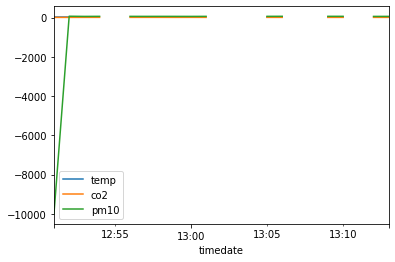

In [3]:
output['refined_data'].plot()

<AxesSubplot:xlabel='timedate'>

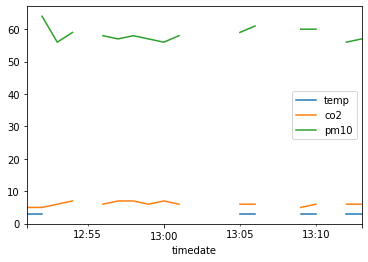

In [4]:
output['datawithMoreCertainNaN'].plot()

<AxesSubplot:xlabel='timedate'>

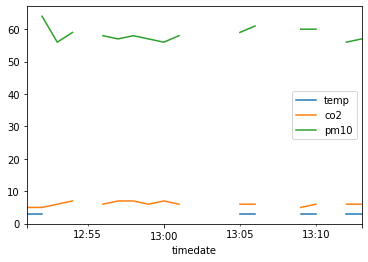

In [5]:
output['datawithMoreUnCertainNaN'].plot()